<a href="https://colab.research.google.com/github/bayusiddik/medium/blob/main/Significance_of_Exploratory_Data%C2%A0Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevinanandakeen","key":"2fae3d1ff36b947b585da3e4cc846c0f"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedevastator/books-sales-and-ratings                               Books Sales and Ratings                           53KB  2023-12-06 04:54:33           1594         27  1.0              
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                            29MB  2023-11-16 01:38:36           1774        178  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data                    763KB  2023-11-21 17:56:32           7952        144  1.0              
jocelyndumlao/cardiovascular-disease-dataset           

In [ ]:
! pip install -q opendatasets

import opendatasets as od



### Preprocessing Data

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
od.download('https://www.kaggle.com/datasets/imdevskp/corona-virus-report/data') # insert ypu kaggle  username and key

Skipping, found downloaded files in "./corona-virus-report" (use force=True to force download)


**Read Data CSV**

In [ ]:
df = pd.read_csv('/content/corona-virus-report/full_grouped.csv')

**Total Number of Rows and Columns**

In [ ]:
df.shape

(35156, 10)

**Columns Name and Index**

In [ ]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=35156, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [ ]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#The column Date has dtype as object let's format it to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


In [ ]:
#renaming column name for country/region column
df = df.rename(columns = {'Country/Region':'Country'})
df.columns

Index(['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

### Data Visualization

In [ ]:
Who_regions = df.groupby('WHO Region')['Confirmed'].sum().sort_values()
Who_regions

WHO Region
Africa                    21791827
Western Pacific           26374411
South-East Asia           55118365
Eastern Mediterranean     74082892
Europe                   248879793
Americas                 402261194
Name: Confirmed, dtype: int64

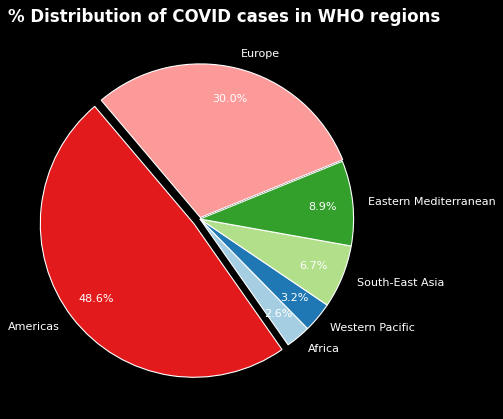

In [ ]:
who_regions = df.groupby('WHO Region')['Confirmed'].sum().sort_values()
explode = [0,0,0,0,0.01,0.05]
plt.figure(figsize = (10,6))
plt.style.use('dark_background')
plt.pie(who_regions.values,explode = explode,labels = who_regions.index,
        autopct = '%1.1f%%',pctdistance = 0.8,startangle = 305,
        colors = plt.cm.Paired.colors,textprops = {'fontsize':10})
plt.title('% Distribution of COVID cases in WHO regions',fontsize = 15,weight = 'bold',loc = 'left')
plt.show()

In [ ]:
#group data by country
country_grouped = df.groupby('Country').max()
country_grouped.sample(5)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Country,,,,,,,,,
Ukraine,2020-07-27,67096,1636,37202,28258,1144,31,1028,Europe
Senegal,2020-07-27,9764,194,6477,3093,177,6,236,Africa
Botswana,2020-07-27,739,2,63,674,123,1,11,Africa
Mozambique,2020-07-27,1701,11,0,1690,62,1,0,Africa
Switzerland,2020-07-27,34477,1978,30900,14349,1321,75,1700,Europe


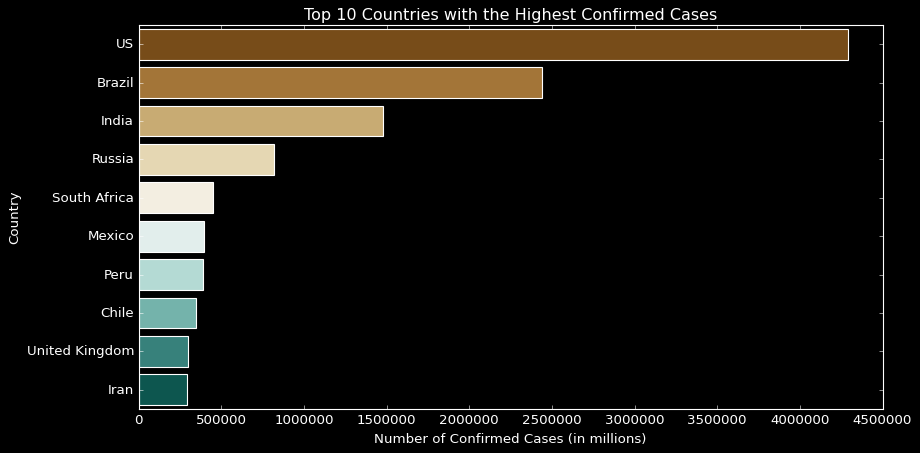

In [ ]:
#nlargest function returns the first `n` rows ordered by `columns` in descending order.
#top 10 countries with highest number of confirmed covid cases
top10_confirmed = country_grouped.nlargest(10,'Confirmed')

#bar chart for confirmed cases
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_confirmed['Confirmed'].sort_values(ascending = False),y = top10_confirmed.index,palette = 'BrBG')
plt.title('Top 10 Countries with the Highest Confirmed Cases')
plt.xlabel('Number of Confirmed Cases (in millions)')
plt.ylabel('Country')
plt.show()


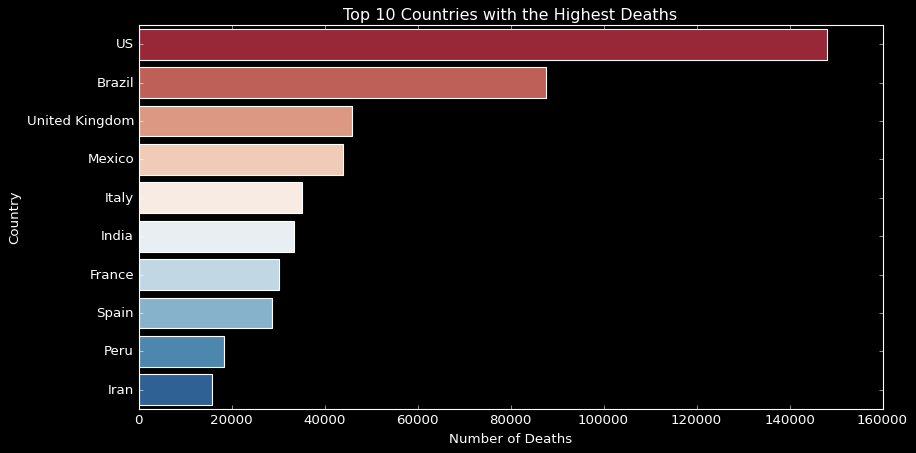

In [ ]:
#top 10 countries with highest number of deaths
top10_deaths = country_grouped.nlargest(10,'Deaths')

#bar chart for covid deaths
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_deaths['Deaths'].sort_values(ascending = False),y = top10_deaths.index,palette = 'RdBu')
plt.title('Top 10 Countries with the Highest Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Country')
plt.show()


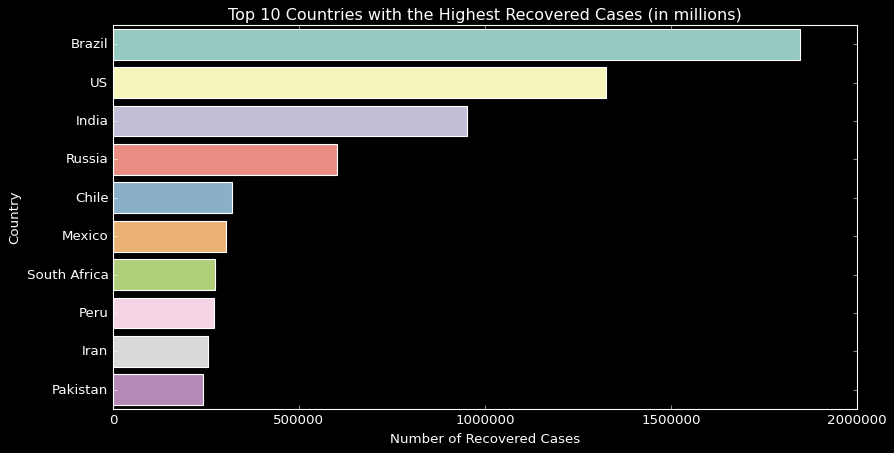

In [ ]:
#top 10 countries with highest number recoveries
top10_recovered = country_grouped.nlargest(10,'Recovered')

#bar chart for recovered cases
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_recovered['Recovered'].sort_values(ascending = False),y = top10_recovered.index,palette = 'Set3')
plt.title('Top 10 Countries with the Highest Recovered Cases (in millions)')
plt.xlabel('Number of Recovered Cases')
plt.ylabel('Country')
plt.show()